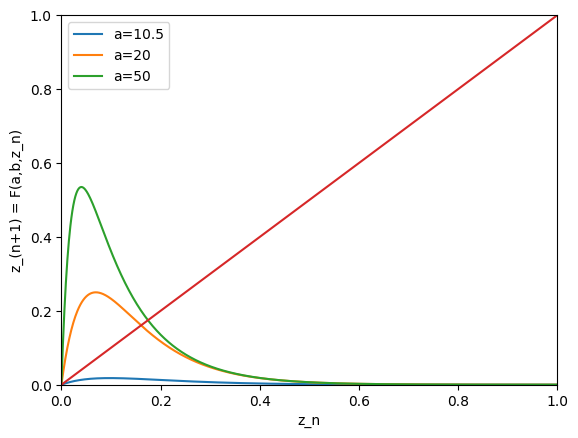

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Funktion F(a,b,z) implementieren
def F(parameter_a, parameter_b, z):
    if z < 0:
        return 0
    else: # d.h. für 0 <= z:
        return (np.exp(- parameter_b * z) - np.exp(- parameter_a * z))

# Parameter definieren
b = 10

# Z = [0,1]
Z = np.linspace(0, 1, 1000)

# Plot erstellen: Winkelhalbierende und F für b=10 fixiert und a={10.5,20,50} einzeichnen
plt.plot(Z, [F(10.5,b,z) for z in Z])
plt.plot(Z, [F(20,b,z) for z in Z])
plt.plot(Z, [F(50,b,z) for z in Z])
plt.plot(Z,Z)
plt.axis([0,1,0,1])
plt.legend(['a=10.5', 'a=20', 'a=50'])
plt.xlabel('z_n')
plt.ylabel('z_(n+1) = F(a,b,z_n)')
plt.show()

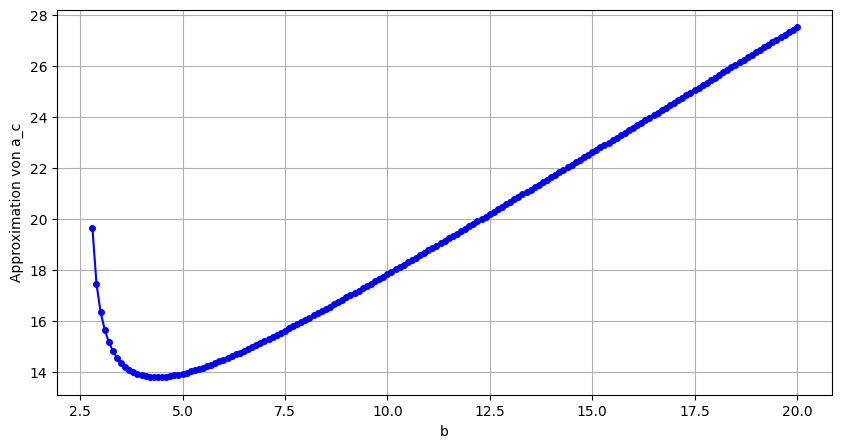

In [50]:
import numpy as np
from scipy.optimize import bisect

def G(z, Parameter_a, Parameter_b):
    if z < 0:
        return 0
    else: # d.h. für 0 <= z:
        return (np.exp(- Parameter_b * z) - np.exp(- Parameter_a * z)) - z

#Ableitung von F auf Z = [0,1]
def dFdz(z, Parameter_a, Parameter_b):
    return -Parameter_b * np.exp(-Parameter_b*z) + Parameter_a * np.exp(-Parameter_a*z)


#Iterative Suche nach dem Parameterwert a, für den F'(z,a,b) = 1 gilt, dort verliert der Fixpunkt z_2* seine Stabilität
#dabei verwenden wir die Monotonie der Ableitung in Abhängigkeit von a
#für die mit der Schrittweite erhaltenen Werte von a im Intervall [a_Untergrenze,a_Obergrenze] approximiert man den Fixpunkt z_2* mit der bisect-Methode
#Für den ersten Wert von a, für den die Ableitung von F in z_2* größer als 1 ist gibt man a zurück
#in diesem Intervall muss der kritische Parameterwert a_c liegen, für den die Ableitung den Wert 1 annimmt
#im nächten Schritt führt man die Suche analog im Intervall [a-vorherige_Schrittweite, a] mit feinerer Schrittweite durch

def iterative_Suche(b, a_Untergrenze, a_Obergrenze, Schrittweite):
    for a in np.arange(a_Untergrenze, a_Obergrenze+Schrittweite, Schrittweite):
        try:
            Fixpunkt_z_2 = bisect(G, 0.001, 0.999, args=(a,b)) #bisect Methode, mit der Voraussetzung, dass der Fixpunkt im Intervall [0,001,0.999] liegt
        except ValueError:
            continue
        Ableitung_im_Fixpunkt_z_2 = dFdz(Fixpunkt_z_2, a, b)
        if abs(Ableitung_im_Fixpunkt_z_2) > 1:
            return a
    return None

def Approximation_a_c(b):
    a_min = b + 1                                                                                   #solange a < b+1 existiert der Fixpunkt z_2* nicht
    a_max = b + 20
    a_c_approximiert = iterative_Suche(b, a_min, a_max, 1)
    if a_c_approximiert is None:
        return None
    for i in (0.1, 0.01, 0.001):
        a_c_approximiert = iterative_Suche(b, a_c_approximiert - (i*10), a_c_approximiert, i)
    return a_c_approximiert

# Approximation von a_c für b in 0.1er Schritten aus [1,20] und Ausgabe des Diagramms
Wertebereich_b = np.arange(1, 20.01, 0.1)
a_c_von_b = []

for b in Wertebereich_b:
    if Approximation_a_c(b) is not None:
        a_c_von_b.append(Approximation_a_c(b))  # Kein a_c gefunden
    else:
        a_c_von_b.append(np.nan)

plt.figure(figsize=(10, 5))
plt.plot(Wertebereich_b, a_c_von_b, marker='o', linestyle='-', color='blue', markersize = 4)
plt.xlabel('b')
plt.ylabel('Approximation von a_c')
plt.grid(True)
plt.show()


In [34]:
#Nachrechnen der Bedingungen für das Vorliegen einer Flip Bifurkation
#Implementierung der partiellen Ableitungen
def F_zz(Parameter_a, Parameter_b, z):
    if z < 0:
        return 0
    else: # 0 <= z:
        return (Parameter_b**2) * np.exp(- Parameter_b * z) - (Parameter_a**2) * np.exp(- Parameter_a * z)

def F_zzz(Parameter_a, Parameter_b, z):
    if z < 0:
        return 0
    else: # 0 <= z:
        return -(Parameter_b**3) * np.exp(- Parameter_b * z) + (Parameter_a**3) * np.exp(- Parameter_a * z)

def F_za(Parameter_a, Parameter_b, z):
    if z < 0:
        return 0
    else: # 0 <= z:
        return (1 - (Parameter_a * z)) * np.exp(- Parameter_a * z)

#Wahl von b und z_Untergrenze und z_Obergrenze für die bisect-Methode
b=10
z_Untergrenze = 0.001
z_Obergrenze = 0.999

#Approximation von a_c und z_2*
a_c = Approximation_a_c(b)
z_2 = bisect(G, z_Untergrenze, z_Obergrenze, args=(a_c, b))

print(a_c)
print(z_2)
print(F(a_c,b,z_2))
print(dFdz(a_c,b,z_2))
print(1/2 * (F_zz(a_c,b,z_2**2)) + 1/3 * (F_zzz(a_c,b,z_2)))
print(F_za(a_c,b,z_2))

17.822000000000017
0.15205238939045743
0.152052389389229
-0.010118318002791967
-12.803668646748037
-0.1137837176980861


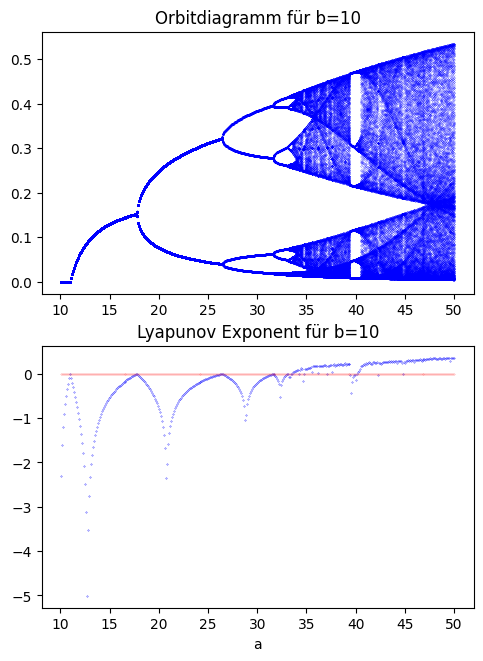

In [64]:
#Erstellen des Bifurkationsdiagramms
def dFdz(input_a, input_b, z):
    if z < 0:
        return 0
    else: # 0 <= z:
        return (- input_b * np.exp(- input_b * z) + input_a * np.exp(- input_a * z))

def Orbit_von_z(Parameter_a, Parameter_b, z, Anzahl_Iterationen):
    Zustände = []
    for j in range(Anzahl_Iterationen):
        z = F(Parameter_a, Parameter_b, z)
        Zustände.append(z)
    return Zustände

def Orbitdiagramm(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen):
    Wertebereich_a = np.linspace(Startwert_a, Endwert_a, int((Endwert_a - Startwert_a) / Schrittweite) + 1)
    x = np.zeros(Anzahl_Iterationen)
    for a in Wertebereich_a:
        O = Orbit_von_z(a, b, z0, Anzahl_Iterationen)
        O = O[zu_verwerfende_Iterationen:]
        a_array = np.full_like(O, a)
        plt.plot(a_array, O, 'b.', markersize=0.2)
    plt.title("Orbitdiagramm für b={}".format(b))

def Lyapunov_Exponent(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen):
    Wertebereich_a = np.linspace(Startwert_a, Endwert_a, int((Endwert_a - Startwert_a) / Schrittweite) + 1)
    x = np.zeros(Anzahl_Iterationen)
    Lyapunov_Exponent = []
    for a in Wertebereich_a:
        O = Orbit_von_z(a, b, z0, Anzahl_Iterationen)
        O = O[zu_verwerfende_Iterationen:]
        Summe = 0
        for i in range (0, Anzahl_Iterationen-zu_verwerfende_Iterationen):
          Summe += np.log(abs(dFdz(a,b,O[i-1])))
        Summe = Summe/(Anzahl_Iterationen-zu_verwerfende_Iterationen)
        Lyapunov_Exponent.append(Summe)
    plt.plot(Wertebereich_a, Lyapunov_Exponent, 'b.', markersize=0.5)
    null = np.zeros(int((Endwert_a - Startwert_a)*10))
    plt.plot(Wertebereich_a, null, 'r.', markersize=0.2)  #Nulllinie als Vergleich einzeichnen
    plt.xlabel('a')
    plt.title("Lyapunov Exponent für b={}".format(b))

# Eingabewerte
b = 10
Startwert_a = b + 0.1
Endwert_a = 50
Schrittweite = 0.1
z0 = 0.7
Anzahl_Iterationen = 1000
zu_verwerfende_Iterationen = 500

plt.subplot(2, 1, 1)
Orbitdiagramm(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen)

plt.subplot(2, 1, 2)
Lyapunov_Exponent(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen)
plt.subplots_adjust(bottom=0, right=0.8, top=1.2)
plt.show()